<a href="https://colab.research.google.com/github/E-girgen/Thesis-Data-Science-Society/blob/main/EDA_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
data = pd.read_csv("Tweets.txt", sep='\t')
 # Stel tab als scheidingsteken in


In [ ]:
data['Category'].value_counts()

joy        400
neutral    219
anger      188
sadness     98
fear        51
love        44
Name: Category, dtype: int64

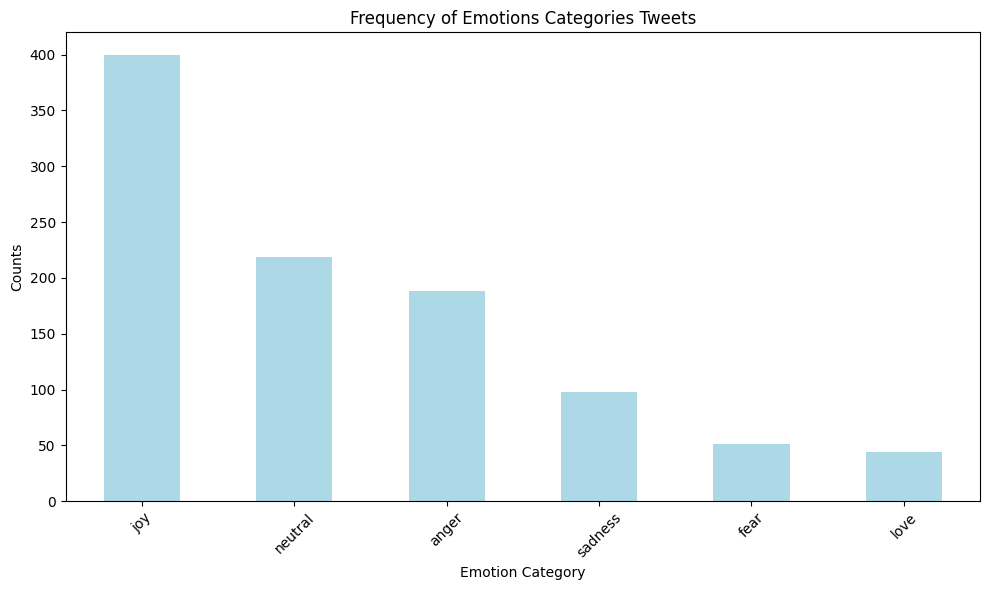

In [ ]:
import matplotlib.pyplot as plt
category_counts = data['Category'].value_counts()

# Create a bar chart for the category counts
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='lightblue')
plt.title('Frequency of Emotions Categories Tweets')
plt.xlabel('Emotion Category')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df= data.copy()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Kleurenpalet met blauwe neutrale kleuren
neutral_colors = ['#87CEEB', '#6CA6CD', '#4682B4', '#3D8B99', '#357083', '#2D6070']

df['Text_Length'] = df['Text'].apply(len)

# Definieer de gewenste volgorde voor de x-as
order = ['joy', 'anger', 'sadness', 'neutral', 'fear', 'love']

# Plot een boxplot met het blauwe neutrale kleurenpalet en de gewenste volgorde
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Text_Length', data=df, order=order, palette=neutral_colors)
plt.title('Distribution of Text Lengths per Emotion Category Captions')
plt.show()







In [ ]:
# Importeer pandas
import pandas as pd

# Maak een nieuwe DataFrame met de gewenste kolommen
nd = df[[ 'Text', 'Category']]

# Optioneel: Als je de index wilt resetten in de nieuwe DataFrame
nd.reset_index(drop=True, inplace=True)

# Bekijk de nieuwe DataFrame
print(nd.head())


                                                Text Category
0  @LINDAnieuws Maandagmorgen en extra druk😣Dat i...    anger
1  @9Owen1 Echt...zweet en shag..en dat een hele ...    anger
2  @ohzitdatzo @telegraaf @VVD D66Pechtold zei 1e...    anger
3  @PostNL heeft mijn pakket om 17.02 bezorgd all...    anger
4  Na premiestijging ziektekosten en pensioen dit...    anger


In [ ]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

                                                Text Category
0  @LINDAnieuws Maandagmorgen en extra druk😣Dat i...    anger
1  @9Owen1 Echt...zweet en shag..en dat een hele ...    anger
2  @ohzitdatzo @telegraaf @VVD D66Pechtold zei 1e...    anger
3  @PostNL heeft mijn pakket om 17.02 bezorgd all...    anger
4  Na premiestijging ziektekosten en pensioen dit...    anger


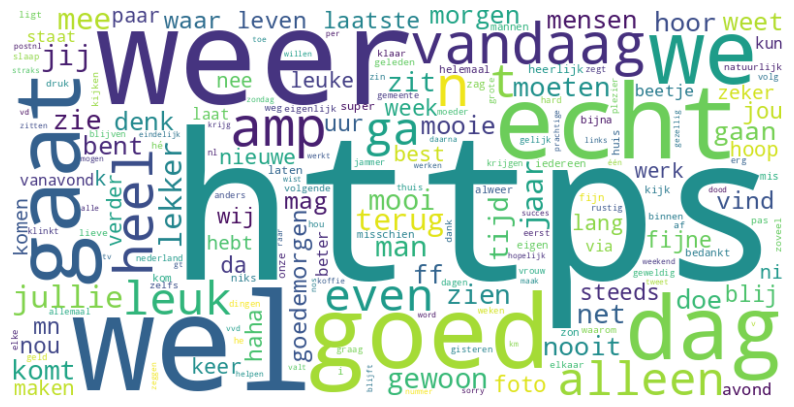

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Maak een nieuwe DataFrame met de gewenste kolommen
nd = df[['Text', 'Category']]

# Optioneel: Als je de index wilt resetten in de nieuwe DataFrame
nd.reset_index(drop=True, inplace=True)

# Bekijk de nieuwe DataFrame
print(nd.head())

# Neem de 'Text'-kolom uit de DataFrame
text_data = ' '.join(nd['Text'])

# Tokenizen en tekst naar kleine letters converteren
tokens = word_tokenize(text_data.lower())

# Verwijder stopwoorden en leestekens
stop_words = set(stopwords.words('dutch'))  # Nederlandse stopwoorden
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Woordfrequentie tellen
word_freq = {}
for word in tokens:
    if word not in word_freq:
        word_freq[word] = 1
    else:
        word_freq[word] += 1

# Wordcloud maken
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Installeer spaCy
!pip install -U spacy

# Download het Nederlandse taalmodel
!python -m spacy download nl_core_news_sm


2023-11-15 16:05:30.969791: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 16:05:30.969874: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 16:05:30.969919: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 16:05:32.857026: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 79.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('nl_core_news_sm')


In [ ]:
nd["Text"] = nd["Text"].apply(clean_text)
nd.iloc[6]

<ipython-input-62-c69b7ffe1767>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd["Text"] = nd["Text"].apply(clean_text)


Text        ik moest lachen😂de reden dat ik niks met madur...
Category                                                anger
Name: 6, dtype: object

In [ ]:
cleaned_tweets = nd.copy()

# Bekijk het resultaat
print(cleaned_tweets)

                                                  Text Category
0    maandagmorgen en extra drukdat is nu voordeel ...    anger
1    echtzweet en shagen dat een hele dagje zal erm...    anger
2    d66pechtold zei 1e belangrijkstepoging😂dream o...    anger
3    heeft mijn pakket om 1702 bezorgd alleen niet ...    anger
4    na premiestijging ziektekosten en pensioen dit...    anger
..                                                 ...      ...
995  jammer ditvoor ons zijn jullie winnaarsduimtro...  sadness
996                                            ikhahsh  sadness
997  pff ik ben ook ziek echt stommmmaar beterschap...  sadness
998  wow wat n heftig nieuws zegik wens je heel vee...  sadness
999  schade na crash rucphen knie bleef lang dik mr...  sadness

[1000 rows x 2 columns]


In [ ]:
cleaned_tweets.to_csv("cleaned_tweets.csv", index=False)

In [ ]:
import spacy
from spacy.lang.nl import Dutch
import re

# Load the Dutch spaCy model
nlp = spacy.load("nl_core_news_sm")

def clean_tweet_spacy_with_smileys(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # Lowercasing
    tweet = tweet.lower()

    # Tokenization with spaCy
    doc = nlp(tweet)

    # Preserve smileys by adding them to tokens
    tokens = [token.lemma_ if token.is_alpha or token.is_punct else token.text for token in doc]

    # Remove stopwords
    stop_words = set(stopwords.words('dutch'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join the tokens into a string
    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet


In [ ]:
nd["Text"] = nd["Text"].apply(clean_tweet_spacy_with_smileys)
cleaned_tweets = nd.copy()

# Bekijk het resultaat
print(cleaned_tweets)

                                                  Text Category
0    maandagmorg extra drukdat voordeel werk maanda...    anger
1    Echtzweet shag heel dag zullen ermee kantoor v...    anger
2    Dpechtold zeggen e belangrijkstepogingdream on...    anger
3    pakket bezorgen alleen mijleuk vakantiekrachte...    anger
4    premiestijging ziektekosten pensioen jaar volg...    anger
..                                                 ...      ...
995          jammer ditvoor jullie winnaarsduimtroffee  sadness
996                                            ikhahsh  sadness
997           pff ziek echt stommmmaar Beterschap baby  sadness
998  wow n heftig Nieuws zegik wens heel sterken be...  sadness
999  schade crash rucphen knie blijven lang dik mri...  sadness

[1000 rows x 2 columns]


<ipython-input-22-942f0e9b09ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nd["Text"] = nd["Text"].apply(clean_tweet_spacy_with_smileys)


In [ ]:
cleaned_tweets

,Text,Category
0,maandagmorg extra drukdat voordeel werk maanda...,anger
1,echtzweet shag heel dag zullen ermee kantoor v...,anger
2,dpechtold zeggen e belangrijkstepogingdream on...,anger
3,pakket bezorgen alleen mijleuk vakantiekrachte...,anger
4,premiestijging ziektekosten pensioen jaar volg...,anger
...,...,...
995,jammer ditvoor jullie winnaarsduimtroffee,sadness
996,ikhahsh,sadness
997,pff ziek echt stommmmaar Beterschap baby,sadness
998,wow n heftig Nieuws zegik wensen heel sterkte ...,sadness


In [ ]:
cleaned_tweets.to_csv("cleaned_tweets.csv", index=False)

In [ ]:
data = pd.read_csv("cleaned_tweets.csv")

In [ ]:
nd =data.copy()

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Overlapping words between Joy and Love:
{'met', 'wel', 'of', 'dit', 'ook', 'best', 'veel', 'hebt', 'kijk', 'te', 'mooiste', 'maar', 'geeft', 'geweest', 'het', 'zich', 'enschede', 'nou', 'wauw', 'hou', 'dat', 'bent', 'hi', 'echt', 'dieren', 'mooie', 'fijne', '2', 'jou', 'naar', 'rijden', 'toch', 'mooi', 'ik', 'en', 'i', 'plezier', 'kan', 'was', 'ff', 'zoals', 'sta', 'vandaag', 'slaap', 'dikke', 'voelt', 'nu', 'tijd', 'weet', 'geweldig', 'al', 'doorgaan', 'nooit', 'doe', 'zien', 'eerste', 'prachtig', '100', 'er', 'herinneringen', 'zag', 'mn', 'een', 'mij', 'pittige', 'praten', 'mijn', 'voor', 'we', 'jullie', 'snapt', 'heel', '😜', 'tot', 'f1', 'ze', 'wens', 'is', 'lief', 'blijft', 'beter', 'mee', 'kunnen', 'vanaf', '😉', '😘', 'aan', 'deze', 'niet', 'zou', 'leuk', 'boeken', 'moet', 'u', 'via', 'bij', 'rustige', 'lange', 'top', 'jij', 'but', 'super', 'liggen', 'keer', 'nog', 'je', 'wil', 'me', 'blij', 'op', 'wij', 'vrouw', 'die', 'das', 'vanavond', 'verder', 'welterusten', 'werk', 'love', 'g

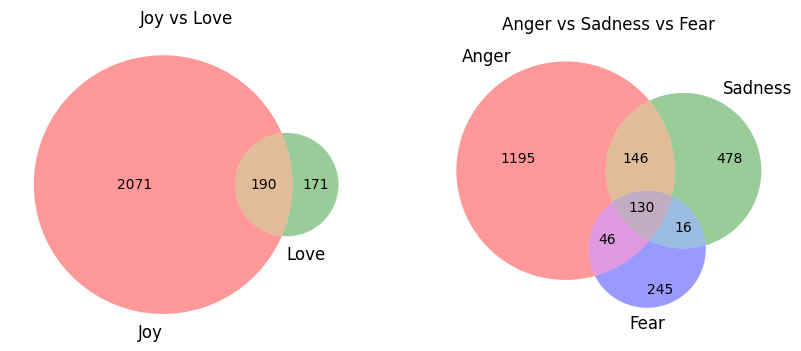

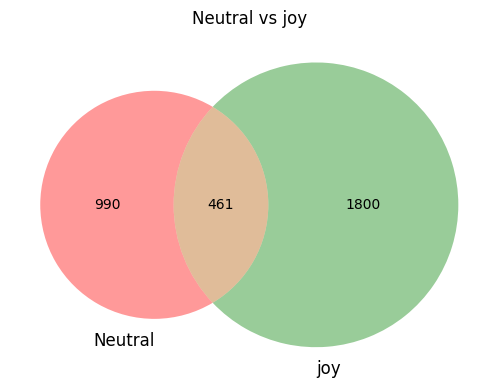

In [ ]:
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Data voor elk sentiment
sentiments = ['joy', 'love', 'anger', 'sadness', 'fear', 'neutral']
sentiment_data = {}

for sentiment in sentiments:
    sentiment_data[sentiment] = nd[nd['Category'] == sentiment]['Text']
    # Tokenizen en tekst naar kleine letters converteren
    sentiment_data[sentiment] = set(word_tokenize(' '.join(sentiment_data[sentiment].str.lower())))

# Overeenkomstige woorden vinden tussen Joy en Love
joy_love_overlap = sentiment_data['joy'].intersection(sentiment_data['love'])

# Overeenkomstige woorden vinden tussen Anger, Sadness en Fear
asf_overlap = sentiment_data['anger'].intersection(sentiment_data['sadness'], sentiment_data['fear'])

# Creëer Venn-diagram voor Joy en Love
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
venn2([sentiment_data['joy'], sentiment_data['love']], set_labels=('Joy', 'Love'))
plt.title('Joy vs Love')

# Creëer Venn-diagram voor Anger, Sadness en Fear
plt.subplot(1, 2, 2)
venn3([sentiment_data['anger'], sentiment_data['sadness'], sentiment_data['fear']], set_labels=('Anger', 'Sadness', 'Fear'))
plt.title('Anger vs Sadness vs Fear')

# Toon de overlappende woorden
print("Overlapping words between Joy and Love:")
print(joy_love_overlap)
print(len(joy_love_overlap))

print("\nOverlapping words between Anger, Sadness, and Fear:")
print(asf_overlap)
print(len(asf_overlap))

# Creëer een Venn-diagram tussen Neutral en de emotie met de meeste overlappende woorden
most_overlap_emotion = max(sentiments[:-1], key=lambda x: len(sentiment_data[x].intersection(sentiment_data['neutral'])))
most_overlap_words = sentiment_data['neutral'].intersection(sentiment_data[most_overlap_emotion])

plt.figure(figsize=(8, 4))
venn2([sentiment_data['neutral'], sentiment_data[most_overlap_emotion]], set_labels=('Neutral', most_overlap_emotion))
plt.title(f'Neutral vs {most_overlap_emotion}')

# Toon de overlappende woorden
print(f"Overlapping words between Neutral and {most_overlap_emotion}:")
print(most_overlap_words)
print(len(most_overlap_words))

# Toon de diagrammen
plt.tight_layout()
plt.show()


Overlapping words between Joy and Love:
{'met', 'wel', 'of', 'dit', 'ook', 'best', 'veel', 'hebt', 'kijk', 'te', 'mooiste', 'maar', 'geeft', 'geweest', 'het', 'zich', 'enschede', 'nou', 'wauw', 'hou', 'dat', 'bent', 'hi', 'echt', 'dieren', 'mooie', 'fijne', '2', 'jou', 'naar', 'rijden', 'toch', 'mooi', 'ik', 'en', 'i', 'plezier', 'kan', 'was', 'ff', 'zoals', 'sta', 'vandaag', 'slaap', 'dikke', 'voelt', 'nu', 'tijd', 'weet', 'geweldig', 'al', 'doorgaan', 'nooit', 'doe', 'zien', 'eerste', 'prachtig', '100', 'er', 'herinneringen', 'zag', 'mn', 'een', 'mij', 'pittige', 'praten', 'mijn', 'voor', 'we', 'jullie', 'snapt', 'heel', '😜', 'tot', 'f1', 'ze', 'wens', 'is', 'lief', 'blijft', 'beter', 'mee', 'kunnen', 'vanaf', '😉', '😘', 'aan', 'deze', 'niet', 'zou', 'leuk', 'boeken', 'moet', 'u', 'via', 'bij', 'rustige', 'lange', 'top', 'jij', 'but', 'super', 'liggen', 'keer', 'nog', 'je', 'wil', 'me', 'blij', 'op', 'wij', 'vrouw', 'die', 'das', 'vanavond', 'verder', 'welterusten', 'werk', 'love', 'g

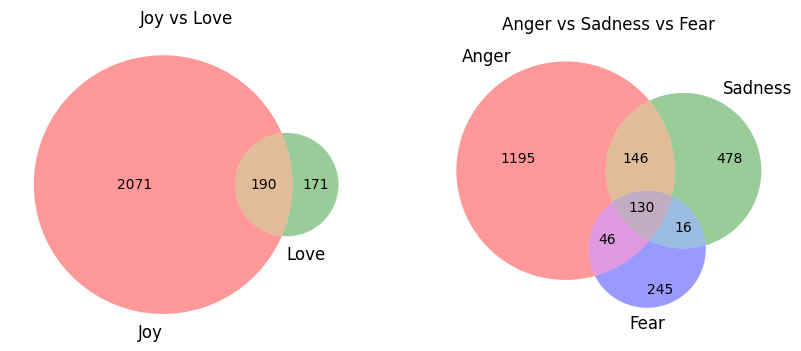

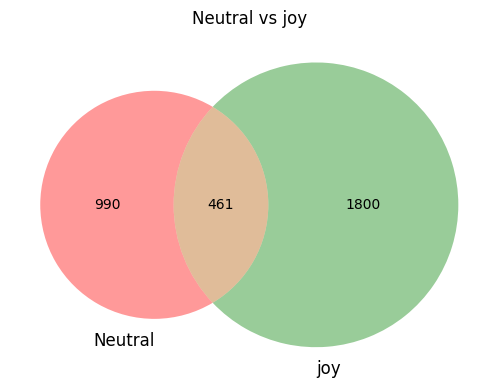

In [ ]:
for sentiment in sentiments:
    sentiment_data[sentiment] = nd[nd['Category'] == sentiment]['Text']
    # Tokenizen en tekst naar kleine letters converteren
    sentiment_data[sentiment] = set(word_tokenize(' '.join(sentiment_data[sentiment].str.lower())))

# Overeenkomstige woorden vinden tussen Joy en Love
joy_love_overlap = sentiment_data['joy'].intersection(sentiment_data['love'])

# Overeenkomstige woorden vinden tussen Anger, Sadness en Fear
asf_overlap = sentiment_data['anger'].intersection(sentiment_data['sadness'], sentiment_data['fear'])

# Creëer Venn-diagram voor Joy en Love
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
venn2([sentiment_data['joy'], sentiment_data['love']], set_labels=('Joy', 'Love'))
plt.title('Joy vs Love')

# Creëer Venn-diagram voor Anger, Sadness en Fear
plt.subplot(1, 2, 2)
venn3([sentiment_data['anger'], sentiment_data['sadness'], sentiment_data['fear']], set_labels=('Anger', 'Sadness', 'Fear'))
plt.title('Anger vs Sadness vs Fear')

# Toon de overlappende woorden
print("Overlapping words between Joy and Love:")
print(joy_love_overlap)
print(len(joy_love_overlap))

print("\nOverlapping words between Anger, Sadness, and Fear:")
print(asf_overlap)
print(len(asf_overlap))

# Creëer een Venn-diagram tussen Neutral en de emotie met de meeste overlappende woorden
most_overlap_emotion = max(sentiments[:-1], key=lambda x: len(sentiment_data[x].intersection(sentiment_data['neutral'])))
most_overlap_words = sentiment_data['neutral'].intersection(sentiment_data[most_overlap_emotion])

plt.figure(figsize=(8, 4))
venn2([sentiment_data['neutral'], sentiment_data[most_overlap_emotion]], set_labels=('Neutral', most_overlap_emotion))
plt.title(f'Neutral vs {most_overlap_emotion}')

# Toon de overlappende woorden
print(f"Overlapping words between Neutral and {most_overlap_emotion}:")
print(most_overlap_words)
print(len(most_overlap_words))

# Toon de diagrammen
plt.tight_layout()
plt.show()

Overlapping words between joy and love:
{'met', 'wel', 'of', 'dit', 'ook', 'best', 'veel', 'hebt', 'kijk', 'te', 'mooiste', 'maar', 'geeft', 'geweest', 'het', 'zich', 'enschede', 'nou', 'wauw', 'hou', 'dat', 'bent', 'hi', 'echt', 'dieren', 'mooie', 'fijne', '2', 'jou', 'naar', 'rijden', 'toch', 'mooi', 'ik', 'en', 'i', 'plezier', 'kan', 'was', 'ff', 'zoals', 'sta', 'vandaag', 'slaap', 'dikke', 'voelt', 'nu', 'tijd', 'weet', 'geweldig', 'al', 'doorgaan', 'nooit', 'doe', 'zien', 'eerste', 'prachtig', '100', 'er', 'herinneringen', 'zag', 'mn', 'een', 'mij', 'pittige', 'praten', 'mijn', 'voor', 'we', 'jullie', 'snapt', 'heel', '😜', 'tot', 'f1', 'ze', 'wens', 'is', 'lief', 'blijft', 'beter', 'mee', 'kunnen', 'vanaf', '😉', '😘', 'aan', 'deze', 'niet', 'zou', 'leuk', 'boeken', 'moet', 'u', 'via', 'bij', 'rustige', 'lange', 'top', 'jij', 'but', 'super', 'liggen', 'keer', 'nog', 'je', 'wil', 'me', 'blij', 'op', 'wij', 'vrouw', 'die', 'das', 'vanavond', 'verder', 'welterusten', 'werk', 'love', 'g

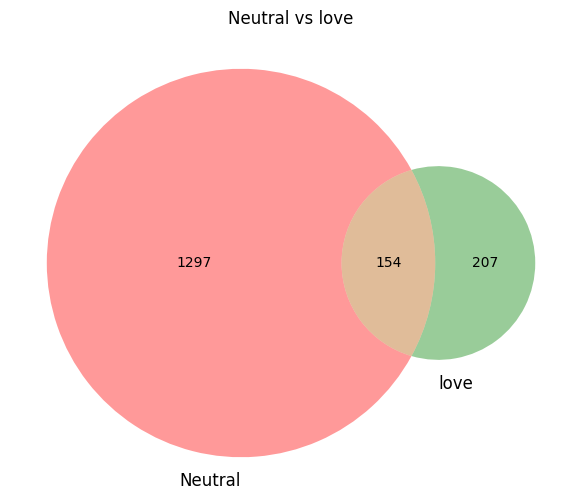

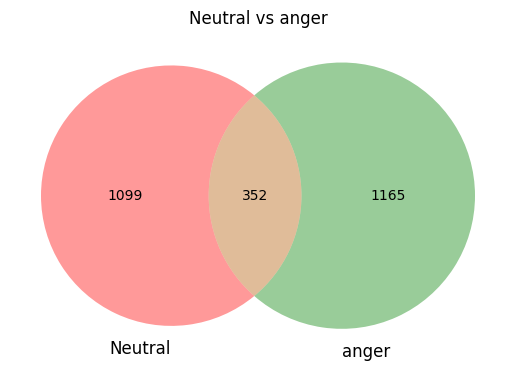

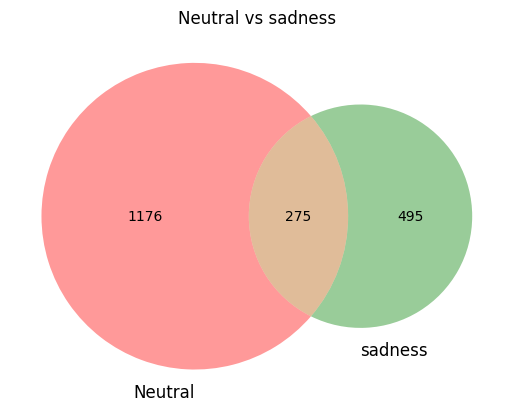

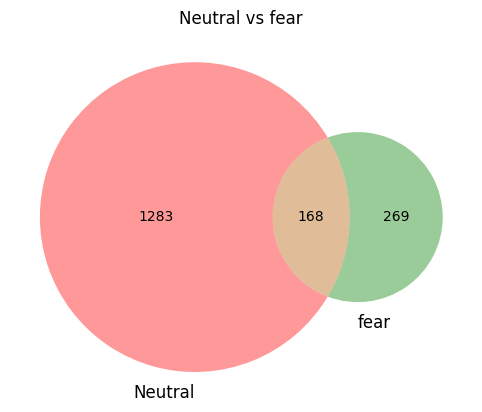

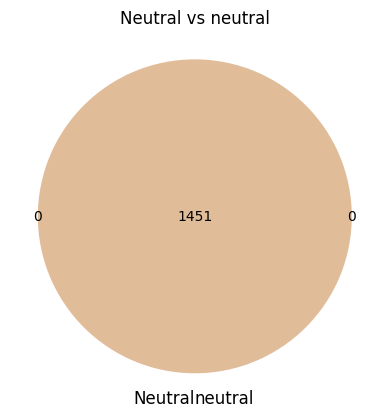

In [ ]:
for sentiment in sentiments:
    sentiment_data[sentiment] = nd[nd['Category'] == sentiment]['Text']
    # Tokenizen en tekst naar kleine letters converteren
    sentiment_data[sentiment] = set(word_tokenize(' '.join(sentiment_data[sentiment].str.lower())))

# Creëer een lege set voor overlappende woorden
overlap_words = {}

# Zoek overlappende woorden tussen alle emoties
for i in range(len(sentiments)):
    for j in range(i+1, len(sentiments)):
        overlap_words[(sentiments[i], sentiments[j])] = sentiment_data[sentiments[i]].intersection(sentiment_data[sentiments[j]])

# Toon de overlappende woorden
for key, value in overlap_words.items():
    print(f"Overlapping words between {key[0]} and {key[1]}:")
    print(value)
    print(len(value))

# Creëer een Venn-diagram voor overlappende woorden tussen Neutral en de emoties
plt.figure(figsize=(10, 6))
for sentiment in sentiments[1:]:
    venn2([sentiment_data['neutral'], sentiment_data[sentiment]], set_labels=('Neutral', sentiment))
    plt.title(f'Neutral vs {sentiment}')
    plt.show()

Overlapping words between joy and love:
{'met', 'wel', 'of', 'dit', 'ook', 'best', 'veel', 'hebt', 'kijk', 'te', 'mooiste', 'maar', 'geeft', 'geweest', 'het', 'zich', 'enschede', 'nou', 'wauw', 'hou', 'dat', 'bent', 'hi', 'echt', 'dieren', 'mooie', 'fijne', '2', 'jou', 'naar', 'rijden', 'toch', 'mooi', 'ik', 'en', 'i', 'plezier', 'kan', 'was', 'ff', 'zoals', 'sta', 'vandaag', 'slaap', 'dikke', 'voelt', 'nu', 'tijd', 'weet', 'geweldig', 'al', 'doorgaan', 'nooit', 'doe', 'zien', 'eerste', 'prachtig', '100', 'er', 'herinneringen', 'zag', 'mn', 'een', 'mij', 'pittige', 'praten', 'mijn', 'voor', 'we', 'jullie', 'snapt', 'heel', '😜', 'tot', 'f1', 'ze', 'wens', 'is', 'lief', 'blijft', 'beter', 'mee', 'kunnen', 'vanaf', '😉', '😘', 'aan', 'deze', 'niet', 'zou', 'leuk', 'boeken', 'moet', 'u', 'via', 'bij', 'rustige', 'lange', 'top', 'jij', 'but', 'super', 'liggen', 'keer', 'nog', 'je', 'wil', 'me', 'blij', 'op', 'wij', 'vrouw', 'die', 'das', 'vanavond', 'verder', 'welterusten', 'werk', 'love', 'g

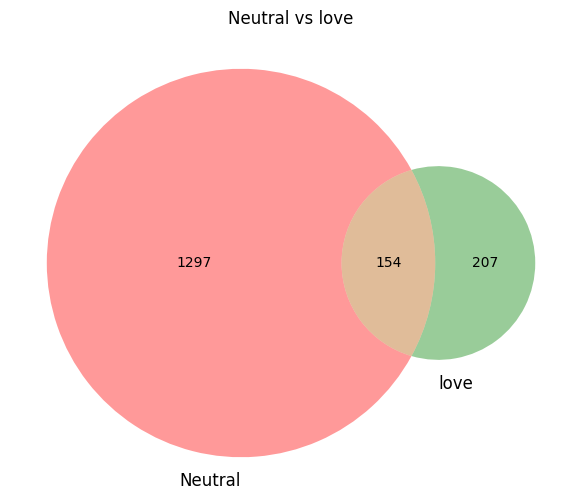

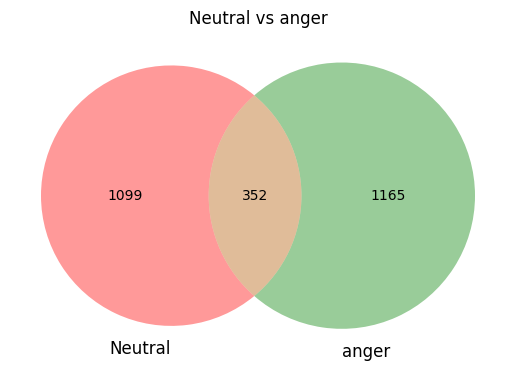

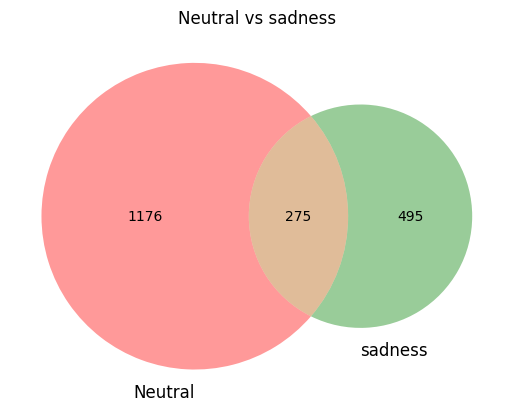

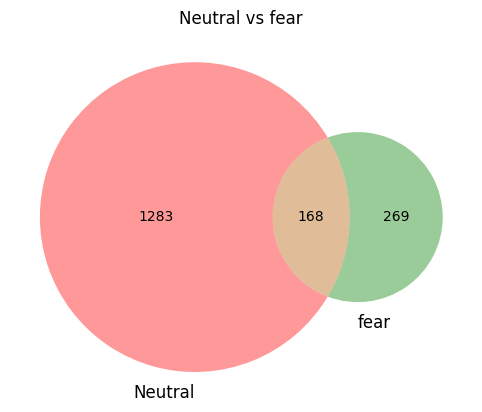

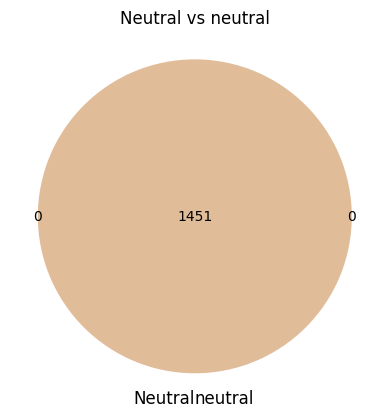

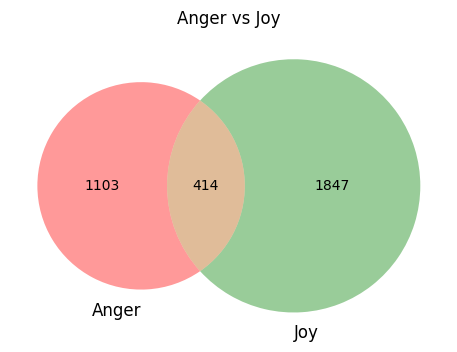

In [ ]:
for sentiment in sentiments:
    sentiment_data[sentiment] = nd[nd['Category'] == sentiment]['Text']
    # Tokenizen en tekst naar kleine letters converteren
    sentiment_data[sentiment] = set(word_tokenize(' '.join(sentiment_data[sentiment].str.lower())))

# Creëer een lege set voor overlappende woorden
overlap_words = {}

# Zoek overlappende woorden tussen alle emoties
for i in range(len(sentiments)):
    for j in range(i+1, len(sentiments)):
        overlap_words[(sentiments[i], sentiments[j])] = sentiment_data[sentiments[i]].intersection(sentiment_data[sentiments[j]])

# Toon de overlappende woorden
for key, value in overlap_words.items():
    print(f"Overlapping words between {key[0]} and {key[1]}:")
    print(value)
    print(len(value))

# Creëer een Venn-diagram voor overlappende woorden tussen Neutral en de emoties
plt.figure(figsize=(10, 6))
for sentiment in sentiments[1:]:
    venn2([sentiment_data['neutral'], sentiment_data[sentiment]], set_labels=('Neutral', sentiment))
    plt.title(f'Neutral vs {sentiment}')
    plt.show()

# Creëer een Venn-diagram voor overlappende woorden tussen Anger en Joy
plt.figure(figsize=(6, 4))
venn2([sentiment_data['anger'], sentiment_data['joy']], set_labels=('Anger', 'Joy'))
plt.title('Anger vs Joy')
plt.show()